# OBJETIVO: Predecir el precio de las viviendas a partir de sus características
<br> <br/>
### Contexto comercial 
El negocio inmobiliario requiere de una negociación entre comprador y vendedor de viviendas. Para iniciar esta negociación es muy útil contar con un "Precio Tentativo" que dependa de las características de la casa. Asimismo, resultaría muy interesante contar con una estimación automática, dejando de lado el criterio del tasador que quizás podría ser subjetivo.
<br> <br/>
### Problema comercial
Al no contar con el precio estimado de la vivienda, es muy dificil para el intermediario poder establecer un punto de negociación de precio entre comprador y vendedor. Por ello es que se requiere contar con un precio estimado en función a ventas históricas de casas similares para que el proceso de negociación sea más ameno para ambas partes.
<br> <br/>
### Contexto analítico 
Para poder desarrollar el modelo se cuenta con un conjunto de 1460 viviendas de Boston.
<br> <br/>
Las variables disponibles (81) son las siguientes: 
<br> <br/>
1. Id
2. SalePrice: el precio de venta de la propiedad en dólares.
3. MSSubClass: Clase de construcción
4. MSZoning: Clasificación de zonificación general
5. LotFrontage: Pies lineales de la calle conectada a la propiedad
6. LotArea: Tamaño del lote en pies cuadrados
7. Street: Tipo de acceso a la carretera
8. Alley: Tipo de acceso al callejón
9. LotShape: Forma general de la propiedad
10. LandContour: Planitud de la propiedad
11. Utilities: Tipo de servicios disponibles
12. LotConfig: Configuración del lote
13. LandSlope: Pendiente de la propiedad
14. Neighborhood: Ubicaciones físicas dentro de los límites de la ciudad de Ames
15. Condition1: Proximidad a carretera principal o ferrocarril
16. Condition2: Proximidad a carretera principal o ferrocarril (si hay una segunda presente)
17. BldgType: Tipo de vivienda
18. HouseStyle: Estilo de vivienda
19. OverallQual: Calidad general de material y acabado
20. OverallCond: Calificación general de condición
22. YearBuilt: Fecha original de construcción
22. YearRemodAdd: Fecha de remodelación
23. RoofStyle: Tipo de techo
24. RoofMatl: Material de techo
25. Exterior1st: Revestimiento exterior de la casa
26. Exterior2nd: Revestimiento exterior de la casa (si hay más de un material)
27. MasVnrType: Tipo de revestimiento de mampostería
28. MasVnrArea: Área de revestimiento de mampostería en pies cuadrados
29. ExterQual: Calidad del material exterior
30. ExterCond: Condición actual del material exterior
31. Foundation: Tipo de cimentación
32. BsmtQual: Altura del sótano
33. BsmtCond: Condición general del sótano
34. BsmtExposure: Paredes del sótano a nivel de jardín o de salida
35. BsmtFinType1: Calidad del área terminada del sótano tipo 1
36. BsmtFinSF1: Pies cuadrados terminados de tipo 1
37. BsmtFinType2: Calidad del segundo área terminada (si está presente)
38. BsmtFinSF2: Pies cuadrados terminados de tipo 2
39. BsmtUnfSF: Pies cuadrados sin terminar del área del sótano
40. TotalBsmtSF: Pies cuadrados totales del área del sótano
41. Heating: Tipo de calefacción
42. HeatingQC: Calidad y condición de la calefacción
43. CentralAir: Aire acondicionado central
44. Electrical: Sistema eléctrico
45. 1stFlrSF: Pies cuadrados del primer piso
46. 2ndFlrSF: Pies cuadrados del segundo piso
47. LowQualFinSF: Pies cuadrados terminados de baja calidad (en todos los pisos)
48. GrLivArea: Pies cuadrados de área de estar sobre el nivel del suelo
49. BsmtFullBath: Baños completos en el sótano
50. BsmtHalfBath: Medio baños en el sótano
51. FullBath: Baños completos sobre el nivel del suelo
52. HalfBath: Medio baños sobre el nivel del suelo
53. Bedroom: Número de habitaciones sobre el nivel del sótano
54. Kitchen: Número de cocinas
55. KitchenQual: Calidad de la cocina
56. TotRmsAbvGrd: Total de habitaciones sobre el nivel del suelo (no incluye baños)
57. Functional: Calificación de funcionalidad de la casa
58. Fireplaces: Número de chimeneas
59. FireplaceQu: Calidad de la chimenea
60. GarageType: Ubicación del garaje
61. GarageYrBlt: Año de construcción del garaje
62. GarageFinish: Acabado interior del garaje
63. GarageCars: Tamaño del garaje en capacidad de autos
64. GarageArea: Tamaño del garaje en pies cuadrados
65. GarageQual: Calidad del garaje
66. GarageCond: Condición del garaje
67. PavedDrive: Entrada pavimentada
68. WoodDeckSF: Área del deck de madera en pies cuadrados
69. OpenPorchSF: Área de porche abierto en pies cuadrados
70. EnclosedPorch: Área de porche cerrado en pies cuadrados
71. 3SsnPorch: Área de porche de tres estaciones en pies cuadrados
72. ScreenPorch: Área de porche con pantalla en pies cuadrados
73. PoolArea: Área de la piscina en pies cuadrados
74. PoolQC: Calidad de la piscina
75. Fence: Calidad de la cerca
76. MiscFeature: Característica miscelánea no cubierta en otras categorías
77. MiscVal: Valor en dólares de la característica miscelánea
78. MoSold: Mes de venta
79. YrSold: Año de venta
80. SaleType: Tipo de venta
81. SaleCondition: Condición de la venta


In [1]:
# Importación de librerías 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Levanto el dataset
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/train.csv'
df = pd.read_csv(url, sep = ',')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Variable Target: SalePrice
La variable objetivo es de tipo **numérica**, por lo que el modelo a desarrollar será de tipo **Aprendizaje Supervisado: Regresión**. 
<br> <br/>
A continuación se presentarán algunas estadísticas para entender el comportamiento, formato y distribución de esta variable. 

In [3]:
# Algunas estadísticas
variable_target = df['SalePrice']
variable_target.describe().round(0)

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribución de SalePrice')

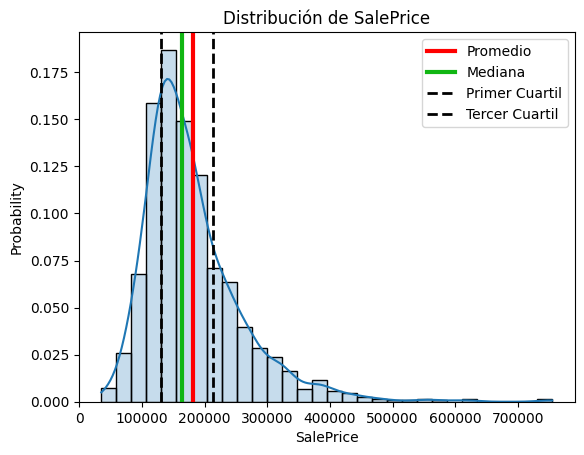

In [4]:
# Histograma variable target 
# Primero calculo algunas medidas que quiero presentar 
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'SalePrice',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución de SalePrice')

## Análisis Variable Target: SalePrice
Se puede observar que la variable tiene una distribución asimétrica positiva (la mediana es menor que el promedio), concentrando gran porción de los registros en valores bajos, y observando muy pocos registros en valores altos.  
<br> <br/>
Esto indicaría que hay muy pocas casas con precios extremadamente altos. 
<br> <br/>
Al tratar con una variable target de este tipo de distribución, una buena prácica suele ser intentar predecir el logaritmo de la variable, para suavizar un poco la curva de valores posibles. 
<br> <br/>
A continuación se presentará el histograma del logaritmo de la variable target. 

/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribución de SalePrice transformado a Logaritmo')

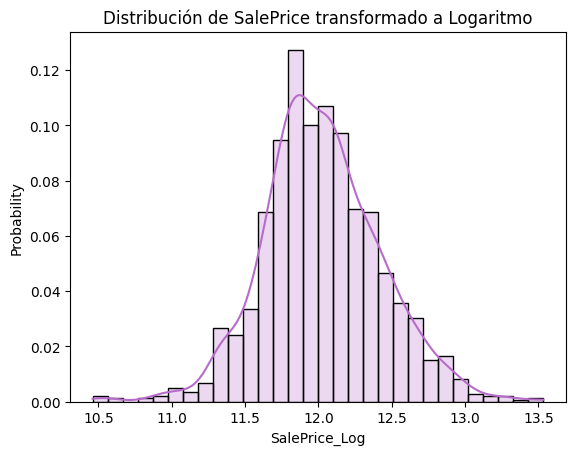

In [5]:
# Primero genero la variable logaritmica 
df['SalePrice_Log'] = np.log(df['SalePrice'])

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'SalePrice_Log',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de SalePrice transformado a Logaritmo')

## Conclusión: 
De esta manera, se puede apreciar una distribución más similar a una distribución "Normal", obteniendo una forma más simétrica de la variable. 

# Exploración de valores vacíos 
A continuación se evaluará la precencia de valores vacíos en las variables disponibles. 

In [6]:
# Calculo y muestro variables con vacíos 
valores_nulos  = df.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos > 0]
print('Cantidad de columnas con valores vacíos:')
print(columnas_con_nulos.shape)
print('')
print('Variables con valores vacíos: ')
print(columnas_con_nulos.sort_values(ascending=False))

Cantidad de columnas con valores vacíos:
(19,)

Variables con valores vacíos: 
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


## Tratamiento de vacíos 
Para cada uno de los campos que cuentan con al menos un valor faltante hay que evaluar la estrategia más adecuada para darle tratamiento. 
<br> <br/>
**Entonces:** 
1. Identificar la columna que contiene vacíos
2. Intentar entender a qué se debe el valor faltante. ¿Es porque no se capturó el dato? ¿Fue un error de procedimiento? ¿Es una categoría más? ¿Es correcto que exista el campo vacío ya que no tiene presencia en ese registro? 
3. De acuerdo a cada caso particular, definir la estrategia más adecuada. ¿Inputo a todos los vacíos con un valor, como el mínimo, el máximo, el promedio, la mediana? ¿Uso algún modelo de inputación? ¿Asigno una categoría? 
<br> <br/>
**Ejemplo:**
La variable con mayor cantidad de valores vacíos es **PoolQC**, que indica la calidad de la piscina.
<br> <br/>
Si accedemos a la descripción de cada una de las variables, vemos que puede tomar los siguientes valores: 
<br> <br/>
     * Ex:	Excellent
     * Gd:	Good
     * TA:	Average/Typical
     * Fa:	Fair
     * NA:	No Pool
 <br> <br/>
**¿Entonces?**
 <br> <br/>
 Este es un caso en donde el dato vacío en realidad ¡ES UN DATO!, ya que me está indicando que la casa no tiene piscina. Aquí no corresponde darle ningún tratamiento especial, sino simplemente tratarlo como una categoría más. 

# Correlación 
Lo próximo que analizaremos es la correlación entre cada variable disponible, y la variable target. 
 <br> <br/>
 Algo a tener en cuenta es que este análisis, en principio, es válido únicamente para las variables numéricas. Dado que el dataset tiene muchas variables disponibles, haremos este análisis para detectar cuáles son las variables numéricas más relacionadas con la variable target, para detenernos en el análisis de algunas de ellas. 

In [8]:
df_numeric = df.select_dtypes(include=[np.number])
matriz_correlacion = df_numeric.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['SalePrice_Log']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['SalePrice', 'SalePrice_Log']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

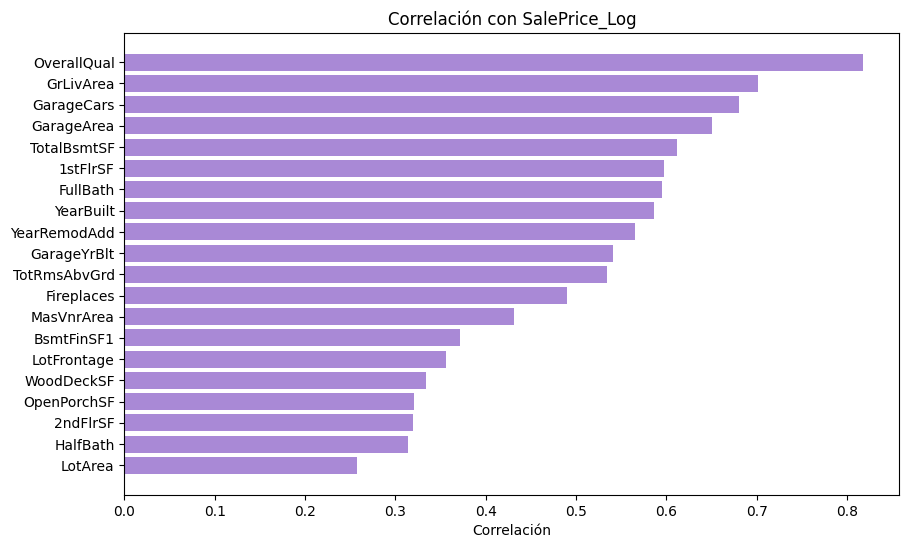

In [9]:
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con SalePrice_Log')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

# OverallQual
Esta variable toma valores del 1 al 10, puntuando el estado de material y finalización de la casa. 10 es excelente, 1 es muy malo. 
 <br> <br/>
 Es una variable más bien categórica, y ordinal. 


## OverallQual: Análisis Univariado 
Lo que observamos en este caso es que la mayor parte de las casas fueron calificadas entre 4 y 8 puntos (94% de las observaciones). 

/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Cantidad de Viviendas')

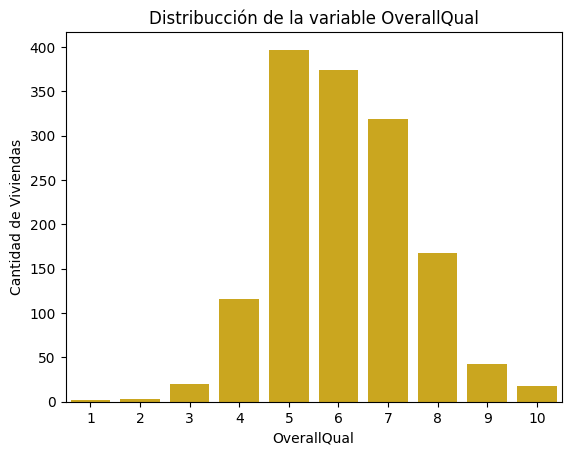

In [10]:
# Cantidad de casos por categoría 
plt.figure()
sns.countplot(data = df,
              x = 'OverallQual',
             color = '#E7B602')
plt.title('Distribucción de la variable OverallQual')
plt.ylabel('Cantidad de Viviendas')

In [11]:
conteo = df['OverallQual'].value_counts() 
conteo_maspresentes = conteo[[4,5,6,7,8]]
print('Porcentaje con OverallQual entre 4 y 8:')
print(str(round(conteo_maspresentes.sum()/conteo.sum(),4)*100) + '%')

Porcentaje con OverallQual entre 4 y 8:
94.11%


## OverallQual: Análisis Bivariado 
Lo próximo que haremos es ver cómo es la relación de esta variable con nuestro target. ¿Se visualiza la alta correlación que calculamos? Veamoslo en un gráfico. 

/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Relación entre Logaritmo del Precio de Venta y OverallQual')

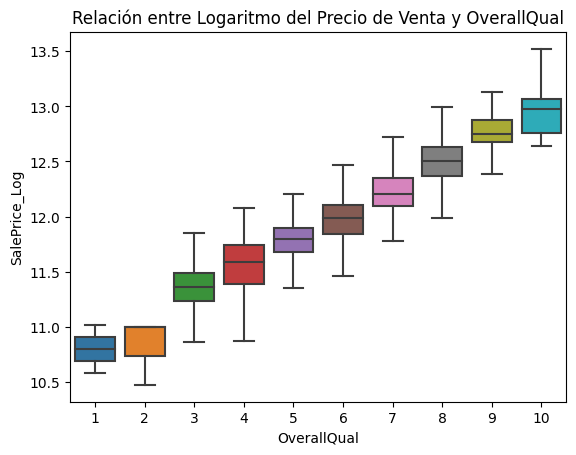

In [12]:
# Boxplot
plt.figure()
sns.boxplot(data = df,
            x = 'OverallQual',
            y = 'SalePrice_Log', 
            showfliers = False)
plt.title('Relación entre Logaritmo del Precio de Venta y OverallQual')

### Conclusión: 
Se puede apreciar que a medida que aumenta el puntaje asignado a la vivienda, el precio mediano y las cajas del boxplot también se incrementan, de manera monótona.
 <br> <br/>
 Esto significa que la variable podría funcionar como una buena predictora del precio de venta. En una siguiente etapa habrá que estudiar cuál es la mejor manera de incluirla en un algoritmo. Pero la relación es evidente y coherente. 

# GrLivArea
Esta variable mide el área habitable en la planta principal. 
 <br> <br/>
 Es una variable numérica. 


## GrLivArea: Análisis Univariado 
 Veamos su distribución y algunas estadísticas. 

In [12]:
df['GrLivArea'].describe().round()

count    1460.0
mean     1515.0
std       525.0
min       334.0
25%      1130.0
50%      1464.0
75%      1777.0
max      5642.0
Name: GrLivArea, dtype: float64

Text(0.5, 1.0, 'Distribución de GrLivArea')

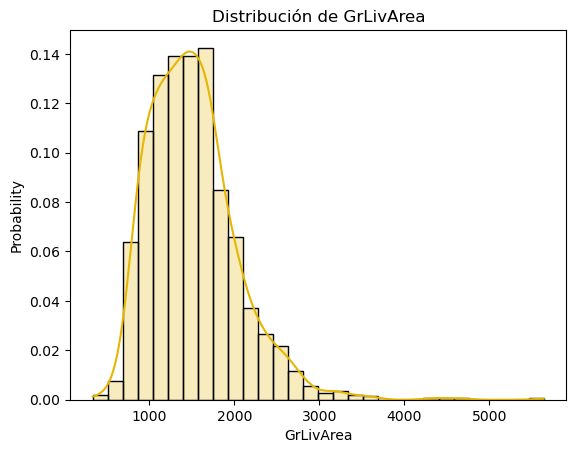

In [13]:
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'GrLivArea',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#E7B602')
plt.title('Distribución de GrLivArea')

Al igual que la variable objetivo, podemos ver que este feature cuenta con una distribución asimétrica positiva. Probemos transformarla en logaritmo para centrar la distribución.

Text(0.5, 1.0, 'Distribución de GrLivArea transformada en logaritmo')

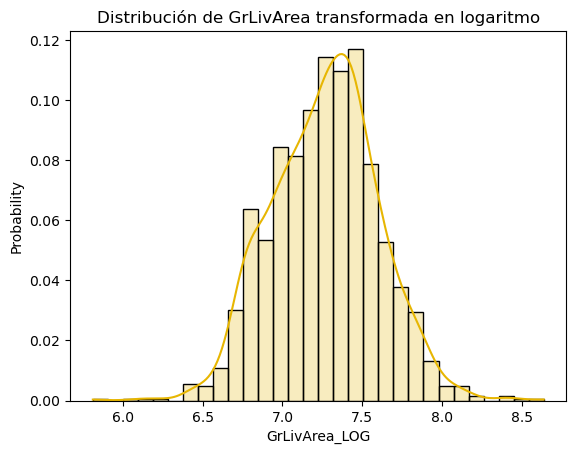

In [14]:
df['GrLivArea_LOG'] = np.log(df['GrLivArea'])
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'GrLivArea_LOG',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#E7B602')
plt.title('Distribución de GrLivArea transformada en logaritmo')

## GrLivArea: Análisis Bivariado 
Lo próximo que haremos es ver cómo es la relación de esta variable con nuestro target. ¿Se visualiza la alta correlación que calculamos? Veamoslo en un gráfico. 

Text(0.5, 1.0, 'Relación entre Precio de Venta y Área Habitable (en logaritmo las dos)')

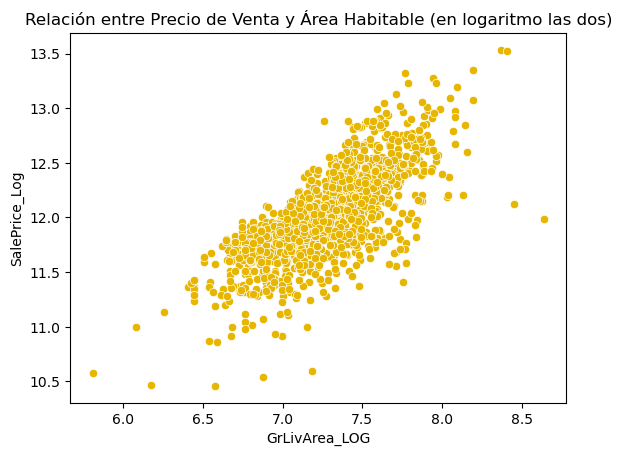

In [15]:
# Gráfico de puntos para evaluar relación
sns.scatterplot(data = df,
                x = 'GrLivArea_LOG',
                y = 'SalePrice_Log',
                color = '#E7B602')
plt.title('Relación entre Precio de Venta y Área Habitable (en logaritmo las dos)')

Efectivamente la relación se muestra muy fuerte. Es una variable importante a considerar, luego hay que definir cuál es la mejor estrategia para incorporarla a un algoritmo. 

# Relación entre las dos variables más correlacionadas con el target
Estas dos variables de manera separada parecieran guardar una fuerte relación con la variable objetivo: el precio de venta de una casa. 
 <br> <br/>
 Ahora bien, algo que también podría ser interesante estudiar es qué relación guardan entre ellas? 
  <br> <br/>
  Veamos gráficamente: 
  

Text(0.5, 1.0, 'Relación entre Logaritmo del GrLivArea_LOG y OverallQual')

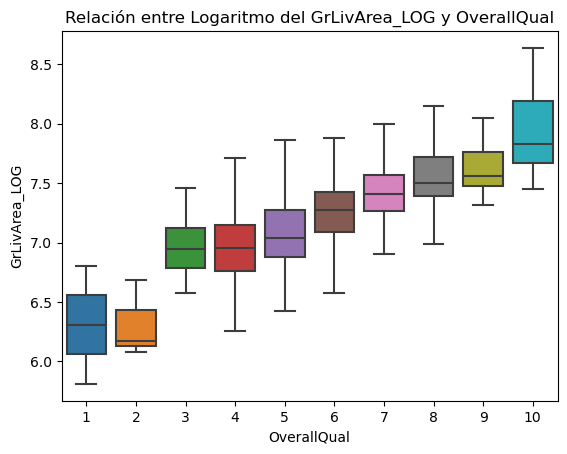

In [16]:
# Boxplot
plt.figure()
sns.boxplot(data = df,
            x = 'OverallQual',
            y = 'GrLivArea_LOG', 
            showfliers = False)
plt.title('Relación entre Logaritmo del GrLivArea_LOG y OverallQual')

Visualmente parecieran mantener una especie de relación, ya que a mayor puntaje pareciera verse mayor área habitable. Calculemos el coeficiente de correlación: 


In [17]:
coeficiente = df[['OverallQual','GrLivArea_LOG']].corr(method='pearson')
coeficiente

,OverallQual,GrLivArea_LOG
OverallQual,1.00000,0.61421
GrLivArea_LOG,0.61421,1.00000


El coeficiente de correlación es positivo (como era esperable, ya que aparentemente la relación es positivo), y es superior a 0.5 lo que indicaría una fuerte relación. 
 <br> <br/>
 Construyamos una variable más acotada sobre la calificación de la casa y evaluemos la relación de las 3 variables en conjunto: precio de venta, área habitable y puntaje de la vivienda. 

In [19]:
# Construyo variable acotada 
# Defino cortes
bin_edges = [0, 4, 6, 11]
bin_labels = ['Malo','Regular','Bueno']
df['OverallQual_BIN'] = pd.cut(df['OverallQual'], 
                                  bins = bin_edges, 
                                  labels = bin_labels, 
                                  include_lowest = True)

Text(0, 0.5, 'Cantidad de Viviendas')

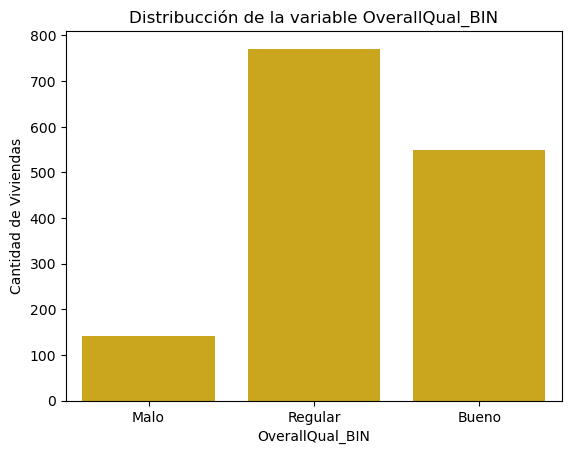

In [20]:
# Cantidad de casos por categoría 
plt.figure()
sns.countplot(data = df,
              x = 'OverallQual_BIN',
             color = '#E7B602')
plt.title('Distribucción de la variable OverallQual_BIN')
plt.ylabel('Cantidad de Viviendas')

Text(0.5, 1.0, 'Relación entre Precio de Venta y Área Habitable (en logaritmo las dos)')

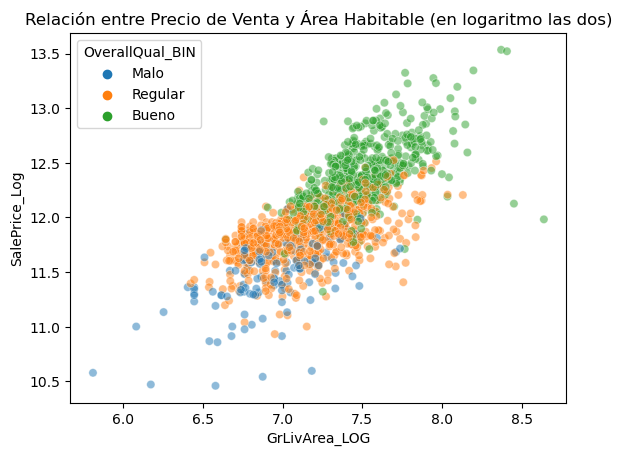

In [21]:
# Genero gráfico para comparar las tres variables 

sns.scatterplot(data = df,
                x = 'GrLivArea_LOG',
                y = 'SalePrice_Log',
                hue = 'OverallQual_BIN',
               alpha = 0.5)
plt.title('Relación entre Precio de Venta y Área Habitable (en logaritmo las dos)')

Tal como sospechabamos, la relación entre las tres variables es muy fuerte ya que se pueden observar tres grupos bien marcados de colores según la calificación de la casa. Esto vamos a tener que tenerlo en cuenta al momento de definir el algoritmo, ya que incluir dos variables con tanta correlación en cierto tipo de modelos puede generar problemas de multicolinealidad. 

# Generación de nuevas variables
Parte importante del trabajo del científico de datos es buscar la mejor manera de sacarle provecho a cada dato disponible. En este caso, trabajaremos en la generación de features a partir de ciertos datos que quizás, analizados de manera aislada, parecieran no tener mucho sentido. 


## Variables con factor tiempo 
Generalmente, las variables que tienen asociada algún tipo de fecha no aportan demasiado valor agregado por si misma. Lo que realmente genera una diferencia es lo que construimos a partir de ellas. 
<br> <br/>
En este caso, tenemos disponible la siguiente información respecto al tiempo: 
* YrSold: Año de venta 
* YearBuilt: Fecha de origen de la construcción de la vivienda 
* YearRemodAdd: Fecha en que se remodeló la vivienda 
* GarageYrBlt: Año en que se construyó el garage 

Text(0.5, 1.0, 'Relación entre Precio de Venta y Año de construcción de la vivienda')

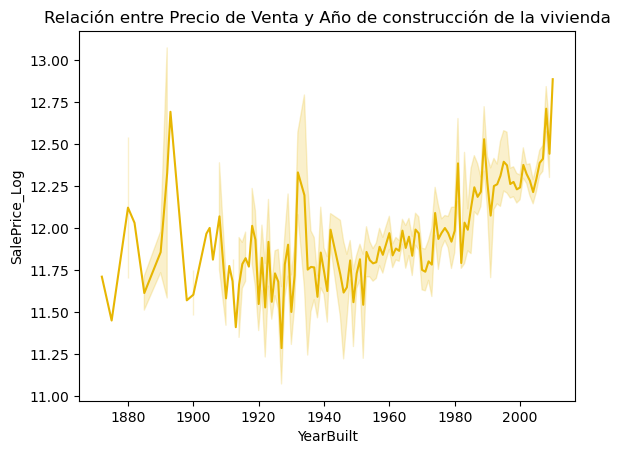

In [42]:
# Boxplot
plt.figure()
sns.lineplot(data = df,
                x = 'YearBuilt',
                y = 'SalePrice_Log',
                color = '#E7B602')
plt.title('Relación entre Precio de Venta y Año de construcción de la vivienda')

## 1) Antig_Viv: Antiguedad de la vivienda 
Generaremos una variable que cuente la cantidad de años transcurridos entre la fecha de construcción de la vivienda y el momento de la venta. Luego, analizaremos si efectivamente la antiguedad de la vivienda tiene alguna influencia en el precio de venta. 

In [4]:
# Construcción de la variable (Antig_Viv): 
df['Antig_Viv'] = df['YrSold'] - df['YearBuilt']
df['Antig_Viv'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Antig_Viv, dtype: float64

Text(0.5, 1.0, 'Distribución de Antiguedad de la Vivienda')

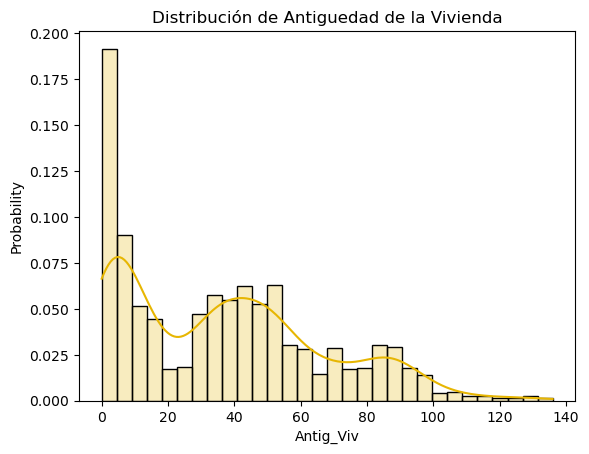

In [25]:
# Histograma
plt.figure()
sns.histplot(data = df,
             x = 'Antig_Viv',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#E7B602')
plt.title('Distribución de Antiguedad de la Vivienda')

### Algunas primeras conclusiones: 
* Hay muchas casas nuevas
* Hay muy pocas casas con más de 100 años 
* La mitad de las casas tienen menos de 35 años de antiguedad

## Antig_Viv: Análisis Bivariado 
Veamos cómo se relaciona la antiguedad de la vivienda con la variable target. 

Text(0.5, 1.0, 'Relación entre Precio de Venta y Antiguedad de la Vivienda al momento de la venta')

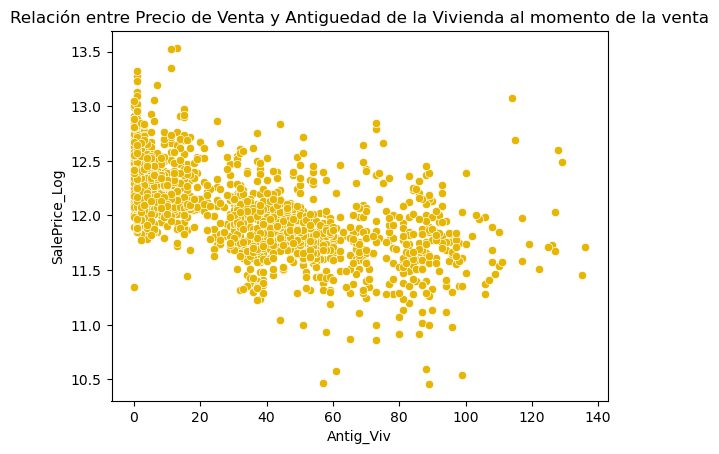

In [5]:
# Gráfico de puntos para evaluar relación
sns.scatterplot(data = df,
                x = 'Antig_Viv',
                y = 'SalePrice_Log',
                color = '#E7B602')
plt.title('Relación entre Precio de Venta y Antiguedad de la Vivienda al momento de la venta')

In [6]:
# Y la correlación ? 
coeficiente = df[['Antig_Viv','SalePrice_Log']].corr(method='pearson')
coeficiente

,Antig_Viv,SalePrice_Log
Antig_Viv,1.00000,-0.58729
SalePrice_Log,-0.58729,1.00000


Text(0.5, 1.0, 'Relación entre Precio de Venta y Antiguedad de la vivienda')

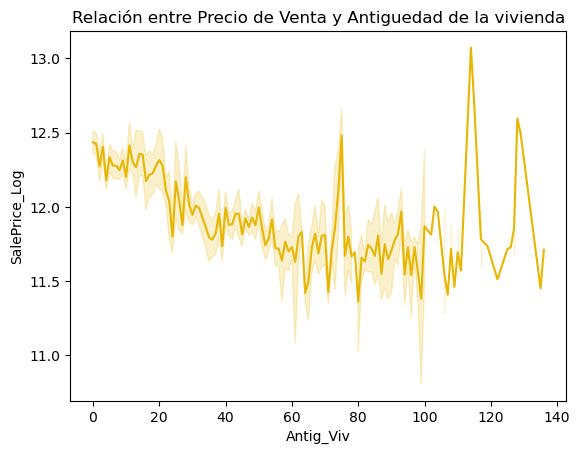

In [44]:
# Boxplot
plt.figure()
sns.lineplot(data = df,
                x = 'Antig_Viv',
                y = 'SalePrice_Log',
                color = '#E7B602')
plt.title('Relación entre Precio de Venta y Antiguedad de la vivienda')

### Conclusiones: 
* No se ven relaciones claras entre la antiguedad de la vivienda y su precio. Quizás las casas nuevas tengan un precio de venta más elevado. Diferenciemosla en categorías. 
* Sin embargo, el coeficiente de correlación es bastante alto en valores absolutos, y es negativo (a mayor antiguedad, menor es el precio)

## 2) Antig_Viv_Bin
Voy a generar una variable categórica que clasifique a las viviendas en función a su antiguedad. Voy a generar los siguientes grupos: 
* Nueva: Antiguedad <= 1
* Joven: Antiguedad > 1 y <= 15 años 
* Madura: Antiguedad > 15 y <= 80 años 
* Antigua: Antiguedad > 80 años

In [7]:
# Construyo variable Antig_Viv_Bin 
# Defino cortes
bin_edges = [-1, 1, 15, 80, 99999]
bin_labels = ['Nueva','Joven','Madura','Antigua']
df['Antig_Viv_Bin'] = pd.cut(df['Antig_Viv'], 
                                  bins = bin_edges, 
                                  labels = bin_labels, 
                                  include_lowest = True)

# Cómo quedó la variable? 
resultados = df.groupby('Antig_Viv_Bin').agg(           
    Min_Antig = ('Antig_Viv', 'min'),            
    Max_Antig = ('Antig_Viv', 'max'),
    Cant = ('Antig_Viv_Bin', 'count')
).reset_index()
resultados

,Antig_Viv_Bin,Min_Antig,Max_Antig,Cant
0,Nueva,0,1,164
1,Joven,2,15,357
2,Madura,16,80,762
3,Antigua,81,136,177


### Antig_Viv_Bin: Análisis Bivariado
Veamos ahora cómo se relaciona esta variable categorizada con el target. 

Text(0.5, 1.0, 'Relación entre Precio de Venta y Antiguedad de la Vivienda categorizada')

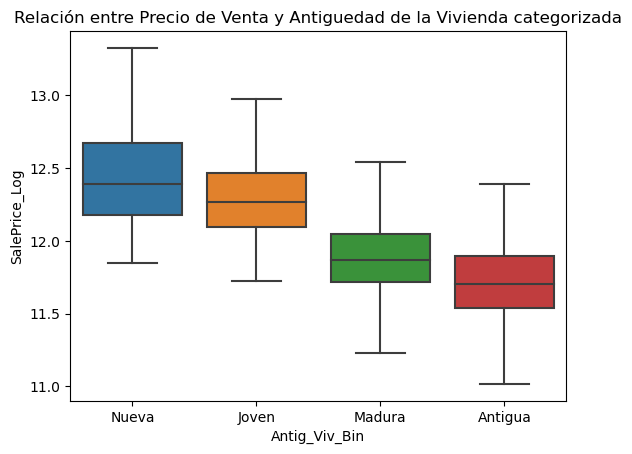

In [8]:
# Boxplot
plt.figure()
sns.boxplot(data = df,
            x = 'Antig_Viv_Bin',
            y = 'SalePrice_Log', 
            showfliers = False)
plt.title('Relación entre Precio de Venta y Antiguedad de la Vivienda categorizada')

### Conclusión: 
Ahora si, se puede observar una clara correlaciíon entre la categoría según su antiguedad y el precio de venta. 

## 3) Antig_Rem: Tiempo desde la última remodelación
Generaremos una variable que cuente la cantidad de años transcurridos entre la última remodelación de la vivienda y el momento de la venta. Luego, analizaremos si efectivamente la antiguedad de la vivienda tiene alguna influencia en el precio de venta. 

In [9]:
# Construcción de la variable (Antig_Rem): 
df['Antig_Rem'] = df['YrSold'] - df['YearRemodAdd']
df['Antig_Rem'].describe()

count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: Antig_Rem, dtype: float64

### Primeras observaciones:
Vemos que el valor mínimo es -1. Esto no podría ser viable para el análisis, ya que aparentemente la remodelación fue posterior a la venta. Entonces, al momento de la venta NO se encuentraba remodelado. 
<br></br>
**¿Qué hacemos en este caso?**
<br></br>
Pensemos. Asignarle un valor = 0 no sería correcto, ya que estaríamos asumiendo que la vivienda se remodeló el mismo año en que se vendió y eso no es cierto. 
<br></br>
Al momento de la venta no sabemos cuando fue la última remodelación. 
<br></br>
En este caso voy a optar por asumir que el momento de remodelación fue el momento en que se construyó la vivienda. 

In [10]:
# Construcción de la variable corregida (Antig_Rem): 
df['Antig_Rem'] = np.where( df['YearRemodAdd'] > df['YrSold'],
                            df['YrSold'] - df['YearBuilt'],
                            df['YrSold'] - df['YearRemodAdd'])
df['Antig_Rem'].describe()

count    1460.000000
mean       22.950685
std        20.639875
min         0.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: Antig_Rem, dtype: float64

Text(0.5, 1.0, 'Distribución de Tiempo desde la última remodelación')

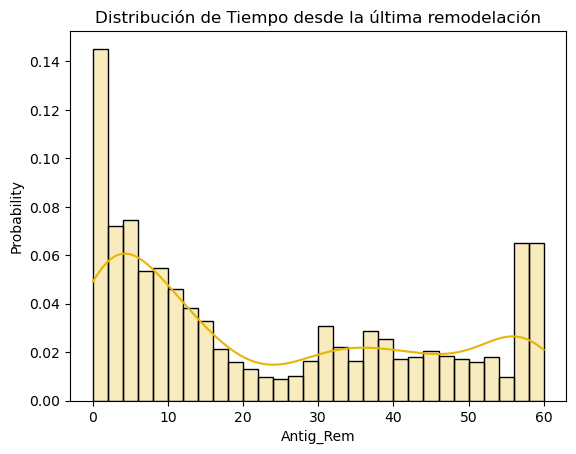

In [36]:
# Histograma
plt.figure()
sns.histplot(data = df,
             x = 'Antig_Rem',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#E7B602')
plt.title('Distribución de Tiempo desde la última remodelación')

## Antig_Rem: Análisis Bivariado
Veamos si existe alguna relación con la variable target

Text(0.5, 1.0, 'Relación entre Precio de Venta y Tiempo desde la última remodelación')

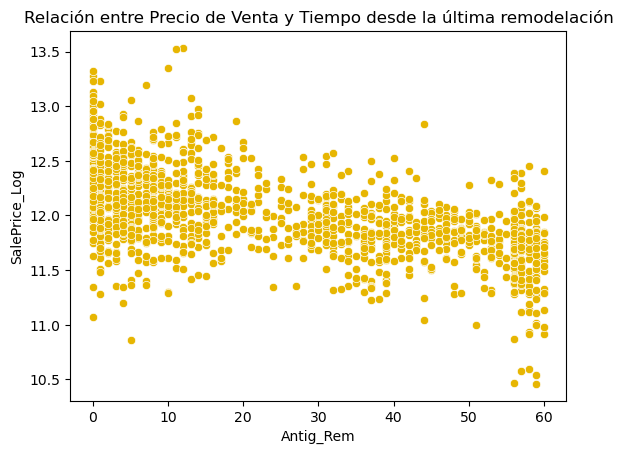

In [11]:
# Gráfico de puntos para evaluar relación
sns.scatterplot(data = df,
                x = 'Antig_Rem',
                y = 'SalePrice_Log',
                color = '#E7B602')
plt.title('Relación entre Precio de Venta y Tiempo desde la última remodelación')

In [39]:
# Y la correlación ? 
coeficiente = df[['Antig_Rem','SalePrice_Log']].corr(method='pearson')
coeficiente

,Antig_Rem,SalePrice_Log
Antig_Rem,1.000000,-0.568149
SalePrice_Log,-0.568149,1.000000


### Primeras conclusiones: 
El coeficiente de correlación es negativo, lo que indicaría que a mayor tiempo desde la última remodelación, menor es el precio de la vivienda. 

## 4) Antig_Rem_Bin
Voy a generar una variable categórica que clasifique a las viviendas en función al tiempo desde la última remodelación. Voy a generar los siguientes grupos: 
* Remod_Reciente: Entre 0 y 10 años
* Remod_Mediana: Entre 11 y 40 años
* Remod_Antigua: Más de 40 años

In [35]:
# Construyo variable Antig_Rem_Bin 
# Defino cortes
bin_edges = [-1, 10, 40, 99999]
bin_labels = ['Remod_Reciente','Remod_Mediana','Remod_Antigua']
df['Antig_Rem_Bin'] = pd.cut(df['Antig_Rem'], 
                                  bins = bin_edges, 
                                  labels = bin_labels, 
                                  include_lowest = True)

# Cómo quedó la variable? 
resultados = df.groupby('Antig_Rem_Bin').agg(           
    Min_Antig = ('Antig_Rem', 'min'),            
    Max_Antig = ('Antig_Rem', 'max'),
    Cant = ('Antig_Rem', 'count')
).reset_index()
resultados

,Antig_Rem_Bin,Min_Antig,Max_Antig,Cant
0,Remod_Reciente,0,10,622
1,Remod_Mediana,11,40,465
2,Remod_Antigua,41,60,373


## Relación entre las dos variables de antiguedad y el precio de venta

Text(0.5, 1.0, 'Relación entre Precio de Venta y Área Habitable (en logaritmo las dos)')

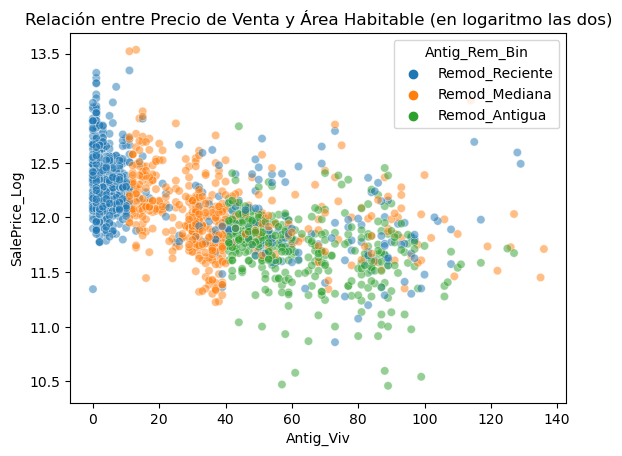

In [36]:
# Genero gráfico para comparar las tres variables 
sns.scatterplot(data = df,
                x = 'Antig_Viv',
                y = 'SalePrice_Log',
                hue = 'Antig_Rem_Bin',
               alpha = 0.5)
plt.title('Relación entre Precio de Venta y Área Habitable (en logaritmo las dos)')

<Axes: xlabel='Antig_Viv_Bin', ylabel='SalePrice_Log'>

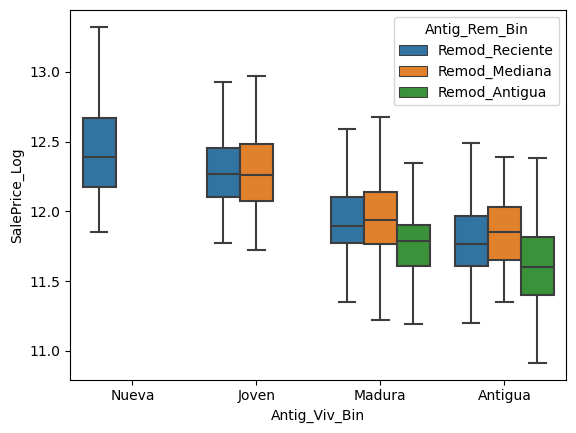

In [37]:
# Genero gráfico para comparar las tres variables 
sns.boxplot(data = df,
            x = 'Antig_Viv_Bin',
            y = 'SalePrice_Log', 
            hue = 'Antig_Rem_Bin',
            showfliers = False)

## 6) Antig_Garage: Tiempo desde que se construye el garage
Generaremos una variable que cuente la cantidad de años transcurridos entre la fecha de construcción del garage y el momento de la venta. 

In [46]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [48]:
# Construcción de la variable corregida (Antig_Rem): 
df['Antig_Garage'] = np.where((df['GarageYrBlt'] > df['YrSold']) | (df['GarageYrBlt'].isnull()),
                            -999,
                            df['YrSold'] - df['GarageYrBlt'])
df['Antig_Garage'].describe()

count    1460.000000
mean      -27.743836
std       236.697011
min      -999.000000
25%         4.000000
50%        23.500000
75%        46.000000
max       107.000000
Name: Antig_Garage, dtype: float64